# Power of Thresholds Part 2

### Purpose: To explore thresholding and binarization of images

__Primer Activity:__

*Step 1: Necessary Imports*

These first steps are the exact same from module_5 lesson except for one additional import

In [8]:
import numpy as np
from skimage import io #importing a specific module from scikit-image
from skimage.filters import try_all_threshold

import matplotlib.pyplot as plt

*Step 2: User Inputs*

In [5]:
#replace the example path from my computer with the path to the image on your computer

cell_im_location = '/Users/hhelmbre/Desktop/packages/textile/example_data/ogd_cells.tif'

Note: The cell image being read in is from the OGD Severity study by Rick Liao, Andrea Joseph, Mengying Zhang, Mike McKenna, Jeremy Filteau, and Hawley Helmbrecht within the Nance lab. It is an image taken from the thalamus with a costain DAPI/PI/Iba

*Step 3: Read in the image*

In [6]:
cell_im = io.imread(cell_im_location)

*Step 4: Splitting our Channels for Thresholding*

In [7]:
red_cell_im = cell_im[:,:, 0]
green_cell_im = cell_im[:,:,1]
blue_cell_im = cell_im[:,:,2]

*Step 5: Try some thresholds*

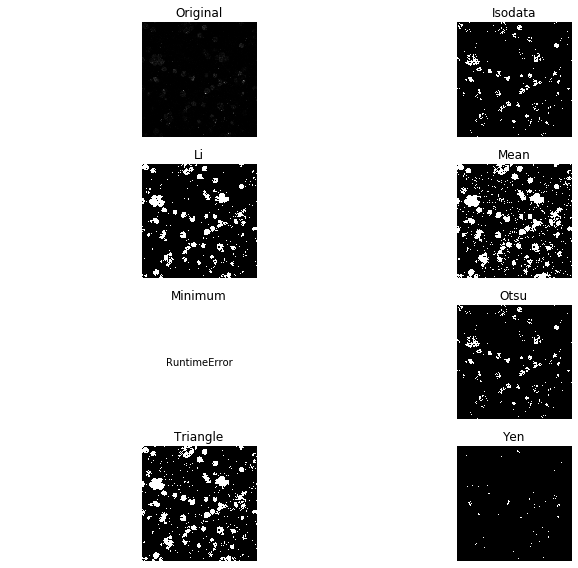

In [12]:
fig, ax = try_all_threshold(green_cell_im, figsize=(10, 8), verbose=False)
plt.show()

*Step 6: Visualize the original image*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


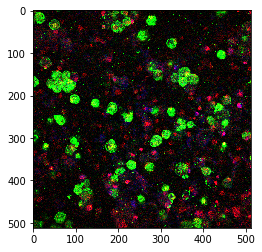

In [13]:
plt.imshow(cell_im)

Based on your eye alone which thresholding method seems like the best method for thresholding the green channel?

__Activity:__

We are now going to specifically apply just one threshold - the otsu threshold. 

Adding the import statement in here because it is most relevant to this section.

_Note:_

The following code is from the scikit image tutorials: https://scikit-image.org/docs/dev/auto_examples/applications/plot_thresholding.html

Scikit-Image tutorials are a great place to learn and explore more about image processing!!!

_Back to the Activity:_

In [15]:
from skimage.filters import threshold_otsu

This is the process of definining the threshold value and then "binarizing" the image.

In [17]:
thresh = threshold_otsu(green_cell_im)
binary = green_cell_im > thresh

In [22]:
thresh

191

Take a guess at what this actual value (above) means and how it is represented in the three plots below:

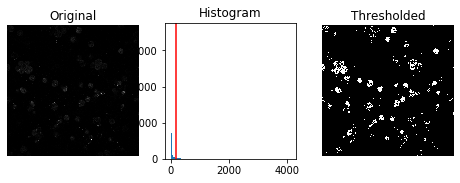

In [18]:
fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(green_cell_im, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(green_cell_im.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

Now we want to look at what the green_cell_im (Original Image above) and the binary im (Thresholded Image above) look like to the computer

In [19]:
green_cell_im

array([[ 25, 101,  65, ...,  16,  11,   0],
       [122, 136,  74, ...,  14,   8,  11],
       [ 29,  84, 111, ...,  22,   0,  15],
       ...,
       [ 22, 140,  78, ...,  11,   7,   0],
       [ 80,  59, 102, ...,   8,  11,  15],
       [ 27,  52,  27, ...,   0,   1,   0]], dtype=uint16)

In [20]:
binary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Are you surprised by these results?

__Recall & Share:__

Glance through the wikipedia page about Otsu Thresholds: https://en.wikipedia.org/wiki/Otsu%27s_method

What is one cool or surprising thing you learned from that page?